NetCDF

In [1]:
import os

DATA_PATH = '../data/modis/lst'
RES_PATH = '../res/modis/lst'


os.chdir(DATA_PATH)

In [2]:
# !conda install -y -c conda-forge rioxarray
# !conda install -y -c conda-forge earthpy

# Import packages
import warnings
from osgeo import gdal

import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep

warnings.simplefilter('ignore')

In [3]:
# !conda install -y h5py
# !conda install -y pytables
import os
import h5py 
import pandas as pd
import numpy as np


In [9]:
filename = 'MOD11A1.A2021221.h19v05.006.2021222101647.hdf'
data = rxr.open_rasterio(filename, masked=True)
data

<xarray.Dataset>
Dimensions:          (y: 1200, x: 1200, band: 1)
Coordinates:
  * y                (y) float64 4.447e+06 4.446e+06 ... 3.337e+06 3.336e+06
  * x                (x) float64 1.112e+06 1.113e+06 ... 2.223e+06 2.223e+06
  * band             (band) int64 1
    spatial_ref      int64 0
Data variables:
    LST_Day_1km      (band, y, x) float32 ...
    Emis_32          (band, y, x) float32 ...
    Clear_day_cov    (band, y, x) float32 ...
    Clear_night_cov  (band, y, x) float32 ...
    QC_Day           (band, y, x) float32 ...
    Day_view_time    (band, y, x) float32 ...
    Day_view_angl    (band, y, x) float32 ...
    LST_Night_1km    (band, y, x) float32 ...
    QC_Night         (band, y, x) float32 ...
    Night_view_time  (band, y, x) float32 ...
    Night_view_angl  (band, y, x) float32 ...
    Emis_31          (band, y, x) float32 ...
Attributes: (12/93)
    ALGORITHMPACKAGEACCEPTANCEDATE:     102004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR11A
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            30.0041666666667
    SPSOPARAMETERS:                     2484 and 3323
    TileID:                             51019005
    VERSIONID:                          6
    VERTICALTILENUMBER:                 5
    WESTBOUNDINGCOORDINATE:             11.543174460363

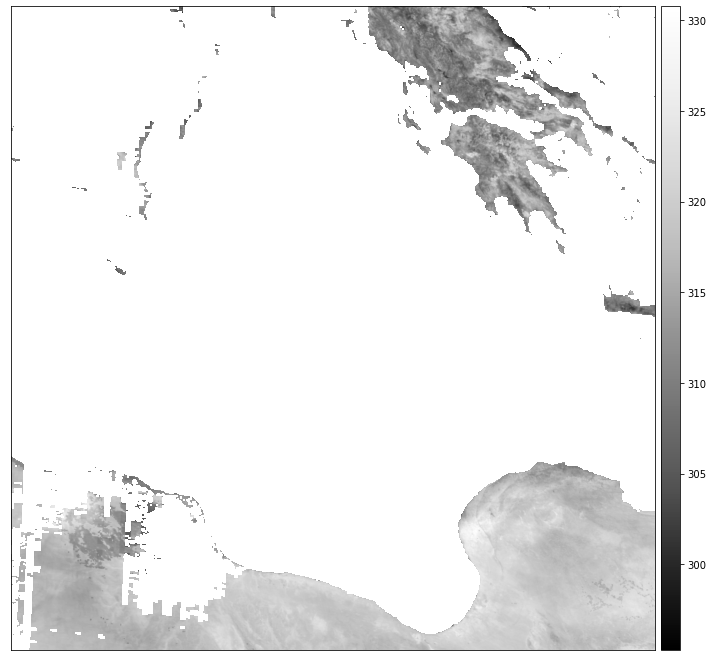

In [25]:
band = data['LST_Day_1km'] * 0.02
ep.plot_bands(band)
plt.show()

In [23]:
def clean_array_plot(xr_obj):
    # This function takes a single xarray object as an input and produces a
    # cleaned numpy array output for plotting
    """
    Take an  xarray object and replace null  values with a mask for plotting

    Parameters
    ----------
    xr_obj : xarray object

    Returns
    -------
    A masked numpy array 

    """

    return ma.masked_array(xr_obj.values,  xr_obj.isnull())

type(band)

xarray.core.dataarray.DataArray

In [24]:
band * 0.02
clean_array_plot(data.LST_Day_1km)

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., 16035.0, 16037.0, 16029.0],
         [--, --, --, ..., 16074.0, 16107.0, 16064.0],
         [--, --, --, ..., 16087.0, 16126.0, 16074.0]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False]]],
  fill_value=1e+20,
  dtype=float32)